We learned usage of RDKit - a python library for cheminformatics. <br>
In this tutorial, we will use a support vector regression (SVR) to predict logP (partition coefficeint). <br>
The input - structural feature of molecules is Morgan fingerprint and the eoutput is logP. <br>

At first, import necessary libraries.

In [4]:
import numpy as np
from rdkit import Chem
from rdkit.Chem.Crippen import MolLogP
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import matplotlib.pyplot as plt

I prepared the SMILES of molecules in ZINC dataset. 
You can download more data from ZINC database - http://zinc.docking.org/

Obtain the molecular fingerprint and logP values from RDKit. <br>
You can see more detail usage of RDKit in a 'RDKit Cookbook' - https://www.rdkit.org/docs/Cookbook.html.

In [5]:
num_mols = 20000
f = open('smiles.txt', 'r')
contents = f.readlines()

fps_total = []
logP_total = []

for i in range(num_mols):
    smi = contents[i].split()[0]
    m = Chem.MolFromSmiles(smi)
    fp = AllChem.GetMorganFingerprintAsBitVect(m,2)
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp,arr)
    fps_total.append(arr)
    logP_total.append(MolLogP(m))
    
fps_total = np.asarray(fps_total)
logP_total = np.asarray(logP_total)

Then split the total dataset to a training and test set.

In [6]:
num_total = fps_total.shape[0]
num_train = int(num_total*0.8)

num_total, num_train, (num_total-num_train)

(5000, 4000, 1000)

In [7]:
fps_train = fps_total[0:num_train]
logP_train = logP_total[0:num_train]
fps_test = fps_total[num_train:]
logP_test = logP_total[num_train:]

We will use a SVR model for a regression model. <br>
Documentation is in here - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html. <br>
In this case, we will use a polynomial kernel and coefficients of the kernel as 5.0.

In [8]:
_gamma = 5.0
clf = SVR(kernel='poly', gamma=_gamma)
clf.fit(fps_train, logP_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=5.0,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

After finish training, we should check the accuracy of our prediction. <br>
For evaluation, we will use r2 and mean squared error for metrics.

In [10]:
logP_pred = clf.predict(fps_test)
r2 = r2_score(logP_test, logP_pred)
mse = mean_squared_error(logP_test, logP_pred)
r2, mse

(0.75989553747443306, 0.40089623135693314)

We can visualize the results from the model. <br> 
Plot (True values - Predicted values), and also linear regression between them.

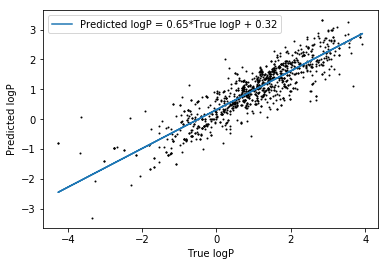

In [11]:
slope, intercept, r_value, p_value, std_error = stats.linregress(logP_test, logP_pred)
yy = slope*logP_test+intercept
plt.scatter(logP_test, logP_pred, color='black', s=1)
plt.plot(logP_test, yy, label='Predicted logP = '+str(round(slope,2))+'*True logP + '+str(round(intercept,2)))
plt.xlabel('True logP')
plt.ylabel('Predicted logP')
plt.legend()
plt.show()

In summary, we use a SVR model for prediction of logP. <br>
With prepared dataset, we can easily preprocess, construct the model and validated the results. <br>
I hope that students became more accustomed to using RDKit, machine learning models and its visualizations. <br>
Don't fear for familiar with data science. Just searching what functions are necessary and use it. I ensure that trials and errors are the best teacher.